In [113]:
#imports are only used for plotting (to check result correctness) and dataset, not the algorithm itself
from sklearn import datasets
import matplotlib.pyplot as plt

[]

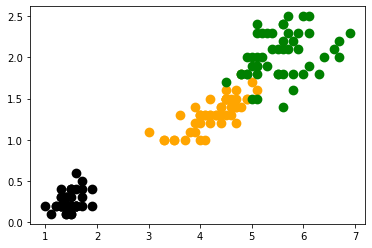

In [114]:
#You normalize your data in another table

iris = datasets.load_iris()
X = iris["data"][:, 2:] # prepare 2D data: 'sepal length (cm)' and 'sepal width (cm)'
Y = iris.target # 0,1,2

for i in range(len(X)):
    if Y[i] == 0:
        plt.scatter(X[i][0], X[i][1], s=60, linewidths=2, color='black')
    if Y[i] == 1:
        plt.scatter(X[i][0], X[i][1], s=60, linewidths=2, color='orange')
    if Y[i] == 2:
        plt.scatter(X[i][0], X[i][1], s=60, linewidths=2, color='green')

plt.plot()  

In [115]:
#You code a simple euclid distance function

def eucleadian_distance(instance1,instance2):
  return (sum([(a - b) ** 2 for a, b in zip(instance1, instance2)])) ** 0.5

In [116]:
#You take a point and calculate the distance to all points
#You take the list from above and sort it

def get_neighbors(training_set, 
                  labels, 
                  test_instance, 
                  k, 
                  distance=eucleadian_distance):
   
    distances = []
    for index in range(len(training_set)):
        dist = distance(test_instance, training_set[index])
        distances.append((training_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors

In [117]:
#You aggregate by target variable
#you take the max to determine the target class

def vote(neighbors):
    class_counter = {}
    for neighbor in neighbors:
        if neighbor[2] in class_counter.keys():
          class_counter[neighbor[2]] += 1
        else:
          class_counter[neighbor[2]] = 1
    return get_target_with_max_votes(class_counter)

def get_target_with_max_votes(map): 
     values = list(map.values())
     keys = list(map.keys())
     return keys[values.index(max(values))]

def get_target_from_KNN(training_set, 
                  labels, 
                  test_instance, 
                  k, 
                  distance=eucleadian_distance):
  
    return vote(get_neighbors(X, Y, point, 5, distance=eucleadian_distance));


In [108]:
point = [5.0, 2.0]
get_target_from_KNN(X, Y, point, 5, distance=eucleadian_distance)

2